# **Setup**

In [1]:
print('Installing torchquantum...')
!git clone -b isca https://github.com/mit-han-lab/torchquantum.git
%cd /content/torchquantum
!pip install --editable . 1>/dev/null
!pip install matplotlib==3.1.3 1>/dev/null

%matplotlib inline
print('All required packages have been successfully installed!')

Installing torchquantum...
Cloning into 'torchquantum'...
remote: Enumerating objects: 13504, done.
remote: Counting objects: 100% (1775/1775), done.
remote: Compressing objects: 100% (754/754), done.
remote: Total 13504 (delta 1049), reused 1573 (delta 937), pack-reused 11729
Receiving objects: 100% (13504/13504), 76.63 MiB | 21.54 MiB/s, done.
Resolving deltas: 100% (7406/7406), done.
Updating files: 100% (222/222), done.
/content/torchquantum
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.15.1 requires matplotlib>=3.2, but you have matplotlib 3.1.3 which is incompatible.
mizani 0.8.1 requires matplotlib>=3.5.0, but you have matplotlib 3.1.3 which is incompatible.
plotnine 0.10.1 requires matplotlib>=3.5.0, but you have matplotlib 3.1.3 which is incompatible.
torchquantum 0.1.7 requires matplotlib>=3.3.2, but you have matplotlib 3.1.3 which is incomp

In [3]:
!pip install torchdiffeq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import torchquantum as tq
import torchquantum.functional as tqf
import numpy as np
import matplotlib.pyplot as plt
import torch

# **1. TorchQuantum basic operations**

## 1.2 TorchQuantum Operations

tq.QuantumDevice Usage

Method 1 of using quantum gates through torchquantum.functional

In [5]:
q_dev = tq.QuantumDevice(n_wires=1, bsz=1)
print(f"all zero state: {q_dev}")
tqf.h(q_dev, wires=0)
print(f"after h gate: {q_dev}")

tqf.rx(q_dev, wires=0, params=[0.3])

print(f"after rx gate: {q_dev}")

all zero state:  class: QuantumDevice 
 device name: default 
 number of qubits: 1 
 batch size: 1 
 current computing device: cpu 
 recording op history: False 
 current states: [[1.+0.j 0.+0.j]]
after h gate:  class: QuantumDevice 
 device name: default 
 number of qubits: 1 
 batch size: 1 
 current computing device: cpu 
 recording op history: False 
 current states: [[0.70710677+0.j 0.70710677+0.j]]
after rx gate:  class: QuantumDevice 
 device name: default 
 number of qubits: 1 
 batch size: 1 
 current computing device: cpu 
 recording op history: False 
 current states: [[0.6991667-0.10566872j 0.6991667-0.10566872j]]


all zero state:  class: QuantumDevice 
 device name: default 
 number of qubits: 1 
 batch size: 1 
 current computing device: cpu 
 recording op history: False 
 current states: [[1.+0.j 0.+0.j]]
after h gate:  class: QuantumDevice 
 device name: default 
 number of qubits: 1 
 batch size: 1 
 current computing device: cpu 
 recording op history: False 
 current states: [[0.70710677+0.j 0.70710677+0.j]]
after rx gate:  class: QuantumDevice 
 device name: default 
 number of qubits: 1 
 batch size: 1 
 current computing device: cpu 
 recording op history: False 
 current states: [[0.6991667-0.10566872j 0.6991667-0.10566872j]]


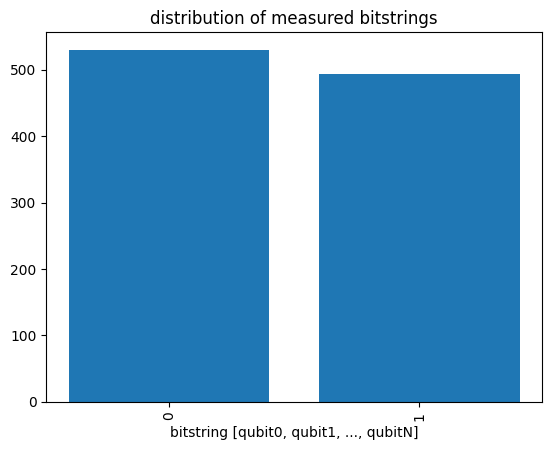

[OrderedDict([('0', 530), ('1', 494)])]


In [6]:
# method 2 of using tq.Operator
q_dev.reset_states(bsz=1)
print(f"all zero state: {q_dev}")

h_gate = tq.H()
h_gate(q_dev, wires=0)

print(f"after h gate: {q_dev}")

rx_gate = tq.RX(has_params=True, init_params=[0.3])

rx_gate(q_dev, wires=0)

print(f"after rx gate: {q_dev}")
bitstring = tq.measure(q_dev, n_shots=1024, draw_id=0)

print(bitstring)

 class: QuantumDevice 
 device name: default 
 number of qubits: 2 
 batch size: 1 
 current computing device: cpu 
 recording op history: False 
 current states: [[0.70710677+0.j 0.        +0.j 0.        +0.j 0.70710677+0.j]]


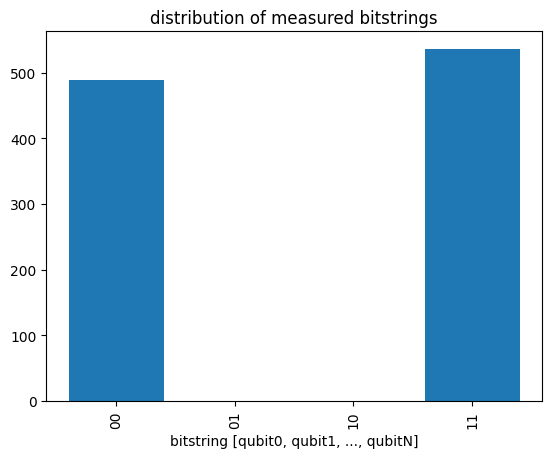

[OrderedDict([('00', 488), ('01', 0), ('10', 0), ('11', 536)])]


In [7]:
# prepare a EPR pair

q_dev = tq.QuantumDevice(n_wires=2)
q_dev.h(wires=0)
q_dev.cnot(wires=[0, 1])

print(q_dev)
bitstring = tq.measure(q_dev, n_shots=1024, draw_id=0)
print(bitstring)


In [8]:
# obtain the expval on a observable by stochastic sampling (doable on simulator and real quantum hardware)
from torchquantum.measure import expval_joint_sampling
expval_sampling = expval_joint_sampling(q_dev, 'ZX', n_shots=1024)
print(expval_sampling)

# obtain the expval on a observable by analytical computation (only doable on classical simulator)
from torchquantum.measure import expval_joint_analytical
expval = expval_joint_analytical(q_dev, 'ZX')
print(expval)

tensor([-0.0039])
tensor([0.])


 class: QuantumDevice 
 device name: default 
 number of qubits: 3 
 batch size: 1 
 current computing device: cpu 
 recording op history: True 
 current states: [[0.        +0.j       0.        +0.j       0.58778524+0.j
  0.        -0.809017j 0.        +0.j       0.        +0.j
  0.        +0.j       0.        +0.j      ]]
 class: QuantumDevice 
 device name: default 
 number of qubits: 3 
 batch size: 1 
 current computing device: cpu 
 recording op history: True 
 current states: [[0.        +0.5237205j  0.72083944+0.j         0.        +0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.26684892j 0.36728606+0.j        ]]


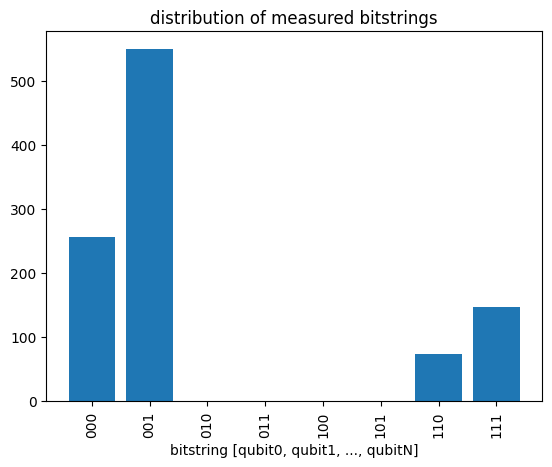

[OrderedDict([('000', 256), ('001', 549), ('010', 0), ('011', 0), ('100', 0), ('101', 0), ('110', 73), ('111', 146)])]


In [9]:
# tq.QuantumDevice
q_dev = tq.QuantumDevice(n_wires=3, record_op=True)
q_dev.x(wires=1)
q_dev.rx(wires=2, params=0.6 * np.pi)
print(q_dev)

q_dev.ry(wires=0, params=0.3 * np.pi)

q_dev.qubitunitary(wires=1, params=[[0, 1j], [-1j, 0]])

q_dev.cnot(wires=[0, 1])

print(q_dev)
bitstring = tq.measure(q_dev, n_shots=1024, draw_id=0)

print(bitstring)

In [10]:
# obtain the qasm string
from torchquantum.plugins import op_history2qasm
print(op_history2qasm(q_dev.n_wires, q_dev.op_history))

OPENQASM 2.0;
include "qelib1.inc";
gate unitary139961686328752 p0 {
	u3(pi,-pi,pi) p0;
}

qreg q[3];
x q[1];
rx(3*pi/5) q[2];
ry(3*pi/10) q[0];
gate unitary139961686328752 p0 {
	u3(pi,-pi,pi) p0;
}
unitary139961686328752 q[1];
cx q[0],q[1];



Batch mode process different states

In [11]:
# batch mode processing

q_dev = tq.QuantumDevice(n_wires=3, bsz=64)
q_dev.x(wires=1)
q_dev.rx(wires=2, params=0.6 * np.pi)
print(q_dev)


 class: QuantumDevice 
 device name: default 
 number of qubits: 3 
 batch size: 64 
 current computing device: cpu 
 recording op history: False 
 current states: [[0.        +0.j       0.        +0.j       0.58778524+0.j
  0.        -0.809017j 0.        +0.j       0.        +0.j
  0.        +0.j       0.        +0.j      ]
 [0.        +0.j       0.        +0.j       0.58778524+0.j
  0.        -0.809017j 0.        +0.j       0.        +0.j
  0.        +0.j       0.        +0.j      ]
 [0.        +0.j       0.        +0.j       0.58778524+0.j
  0.        -0.809017j 0.        +0.j       0.        +0.j
  0.        +0.j       0.        +0.j      ]
 [0.        +0.j       0.        +0.j       0.58778524+0.j
  0.        -0.809017j 0.        +0.j       0.        +0.j
  0.        +0.j       0.        +0.j      ]
 [0.        +0.j       0.        +0.j       0.58778524+0.j
  0.        -0.809017j 0.        +0.j       0.        +0.j
  0.        +0.j       0.        +0.j      ]
 [0.        +0.j     

In [12]:
q_dev = tq.QuantumDevice(n_wires=2)
print(q_dev)
q_dev.set_states(torch.tensor([[0, 0, 1, 0], [0, 1, 0, 0]]).to(torch.complex64))
print(q_dev)

q_dev.x(wires=0)
print(q_dev)

 class: QuantumDevice 
 device name: default 
 number of qubits: 2 
 batch size: 1 
 current computing device: cpu 
 recording op history: False 
 current states: [[1.+0.j 0.+0.j 0.+0.j 0.+0.j]]
 class: QuantumDevice 
 device name: default 
 number of qubits: 2 
 batch size: 1 
 current computing device: cpu 
 recording op history: False 
 current states: [[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]
 class: QuantumDevice 
 device name: default 
 number of qubits: 2 
 batch size: 1 
 current computing device: cpu 
 recording op history: False 
 current states: [[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]


In [13]:
# demonstrate the GPU processing

n_qubits = 20
bsz = 20
run_iters = 5
use_gpu = True

q_dev = tq.QuantumDevice(n_wires=n_qubits, bsz=bsz)
if use_gpu:
    q_dev.to(torch.device('cuda'))

# start = time.time()

start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)

start.record()
for k in range(run_iters):
    print(k)
    for qid in range(n_qubits):
        q_dev.rx(qid, params=np.random.rand())
        q_dev.cnot(wires=[qid, (qid+1) % n_qubits])
end.record()

torch.cuda.synchronize()

print(f"Use GPU: {use_gpu}, avg runtime for circuit with {n_qubits} qubits, {2*n_qubits} gates, {bsz} batch size is {start.elapsed_time(end) / run_iters / 1000:.2f} second")



0
1
2
3
4
Use GPU: True, avg runtime for circuit with 20 qubits, 40 gates, 20 batch size is 0.31 second


In [14]:
# automatic gradient computation
q_dev = tq.QuantumDevice(n_wires=2)
q_dev._states.requires_grad = True

q_dev.x(wires=0)
q_dev.rx(wires=1, params=0.6 * np.pi)
print(q_dev)
target_quantum_state = torch.tensor([0, 0, 0, 1], dtype=torch.complex64)
loss = 1 - (q_dev.get_states_1d()[0] @ target_quantum_state).abs()

print(loss)

loss.backward()

print(q_dev._states.grad)


 class: QuantumDevice 
 device name: default 
 number of qubits: 2 
 batch size: 1 
 current computing device: cpu 
 recording op history: False 
 current states: [[0.        +0.j       0.        +0.j       0.58778524+0.j
  0.        -0.809017j]]
tensor(0.1910, grad_fn=<RsubBackward1>)
tensor([[[-0.8090+0.0000j,  0.0000+0.5878j],
         [ 0.0000+0.0000j,  0.0000+0.0000j]]])


In [15]:
# build a circuit

class QModel(tq.QuantumModule):
    def __init__(self):
        super().__init__()
        self.n_wires = 2
        self.u3_0 = tq.U3(has_params=True, trainable=True)
        self.u3_1 = tq.U3(has_params=True, trainable=True)
        self.cu3_0 = tq.CU3(has_params=True, trainable=True)
        self.cu3_1 = tq.CU3(has_params=True, trainable=True)
        self.u3_2 = tq.U3(has_params=True, trainable=True)
        self.u3_3 = tq.U3(has_params=True, trainable=True)
        self.random_layer = tq.RandomLayer(n_ops=10,
                                           wires=list(range(self.n_wires)))

    def forward(self, q_device: tq.QuantumDevice):
        self.u3_0(q_device, wires=0)
        self.u3_1(q_device, wires=1)
        self.cu3_0(q_device, wires=[0, 1])
        self.u3_2(q_device, wires=0)
        self.u3_3(q_device, wires=1)
        self.cu3_1(q_device, wires=[1, 0])
        self.random_layer(q_device)


q_dev = tq.QuantumDevice(n_wires=2, bsz=3)
print(q_dev)

model = QModel()
model(q_dev)
print(q_dev)

 class: QuantumDevice 
 device name: default 
 number of qubits: 2 
 batch size: 3 
 current computing device: cpu 
 recording op history: False 
 current states: [[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]]
 class: QuantumDevice 
 device name: default 
 number of qubits: 2 
 batch size: 3 
 current computing device: cpu 
 recording op history: False 
 current states: [[-0.10968091-0.40681642j -0.40433568+0.42594218j  0.2619914 -0.13861017j
  -0.43819892-0.4446187j ]
 [-0.10968091-0.40681642j -0.40433568+0.42594218j  0.2619914 -0.13861017j
  -0.43819892-0.4446187j ]
 [-0.10968091-0.40681642j -0.40433568+0.42594218j  0.2619914 -0.13861017j
  -0.43819892-0.4446187j ]]


In [16]:
# Apply gates to qdev with tq.QuantumModule
q_dev = tq.QuantumDevice(n_wires=2, bsz=3)
ops = [
    {'name': 'hadamard', 'wires': 0},
    {'name': 'cnot', 'wires': [0, 1]},
    {'name': 'rx', 'wires': 0, 'params': 0.5, 'trainable': True},
    {'name': 'u3', 'wires': 0, 'params': [0.1, 0.2, 0.3], 'trainable': True},
    {'name': 'h', 'wires': 1, 'inverse': True}
]

qmodule = tq.QuantumModule.from_op_history(ops)
qmodule(q_dev)
print(q_dev)

 class: QuantumDevice 
 device name: default 
 number of qubits: 2 
 batch size: 3 
 current computing device: cpu 
 recording op history: False 
 current states: [[ 0.4588924 -0.12479635j  0.50515497+0.13660912j  0.50880915+0.12229842j
  -0.34288543-0.32952383j]
 [ 0.4588924 -0.12479635j  0.50515497+0.13660912j  0.50880915+0.12229842j
  -0.34288543-0.32952383j]
 [ 0.4588924 -0.12479635j  0.50515497+0.13660912j  0.50880915+0.12229842j
  -0.34288543-0.32952383j]]


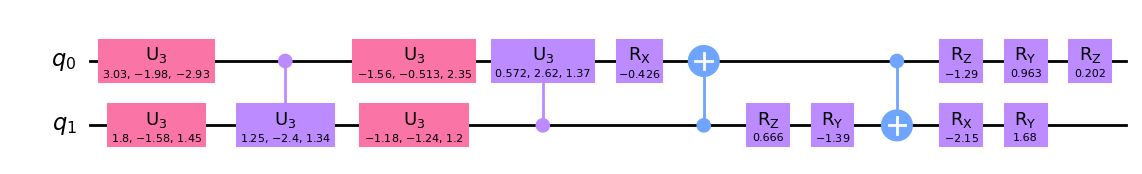

In [17]:
# easy conversion to qiskit
from torchquantum.plugins.qiskit_plugin import tq2qiskit

circ = tq2qiskit(q_dev, model)
circ.draw('mpl')

In [18]:
! pip install pennylane

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 85.4 MB/s eta 0:00:00


In [19]:
# Speed comparison with pennylane

import pennylane as qml
from pennylane import numpy as np
import random
import time


In [20]:
n_wires = 10
bsz = 32
use_gpu=False

In [21]:
dev=qml.device("default.qubit",wires=n_wires)

@qml.qnode(dev,interface="torch")
def pennylane_circ(params):
    qml.Rot(params[0],params[1],params[2],wires=0)
    qml.Rot(params[3],params[4],params[5],wires=1)
    qml.ctrl(qml.Rot,control=0)(params[6],params[7],params[8],wires=1)
    qml.Rot(params[9],params[10],params[11],wires=0)
    qml.Rot(params[12],params[13],params[14],wires=1)
    qml.ctrl(qml.Rot,control=1)(params[15],params[16],params[17],wires=0)
    return qml.state()

if use_gpu:
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

params=np.zeros(18)

reps = 20
start = time.time()
for _ in range(reps):
  for k in range(bsz):
    pennylane_circ(params)

end = time.time()
pennylane_time = (end-start)/reps
print(f"Pennylane inference time: {pennylane_time}")


Pennylane inference time: 0.30300809144973756


In [22]:
reps = 1000
'''
Circuit definition in torchquantum
'''
class QModel(tq.QuantumModule):
    def __init__(self, bsz, n_wires):
        super().__init__()
        self.bsz = bsz
        self.n_wires = n_wires
        self.u3_0 = tq.U3(has_params=True, trainable=True)
        self.u3_1 = tq.U3(has_params=True, trainable=True)
        self.cu3_0 = tq.CU3(has_params=True, trainable=True)
        self.cu3_1 = tq.CU3(has_params=True, trainable=True)
        self.u3_2 = tq.U3(has_params=True, trainable=True)
        self.u3_3 = tq.U3(has_params=True, trainable=True)

    def forward(self, q_device: tq.QuantumDevice):
        q_device.reset_states(self.bsz)
        self.u3_0(q_device, wires=0)
        self.u3_1(q_device, wires=1)
        self.cu3_0(q_device, wires=[0, 1])
        self.u3_2(q_device, wires=0)
        self.u3_3(q_device, wires=1)
        self.cu3_1(q_device, wires=[1, 0])

tq_circ = QModel(n_wires=n_wires, bsz=bsz).to(device)
q_device = tq.QuantumDevice(n_wires=n_wires)


start = time.time()
for _ in range(reps):
  tq_circ(q_device)

end = time.time()
tq_time = (end-start)/reps

print(f"TorchQuantum inference time {tq_time}; is {pennylane_time/tq_time} X faster")

TorchQuantum inference time 0.004267155170440674; is 71.00939135017337 X faster


## 1.3 TorchQuantum for state preparation circuit

In [23]:
import torch
import torch.optim as optim
import argparse

import torchquantum as tq
from torch.optim.lr_scheduler import CosineAnnealingLR

import random
import numpy as np

In [24]:
class QModel(tq.QuantumModule):
    def __init__(self):
        super().__init__()
        self.n_wires = 2
        self.u3_0 = tq.U3(has_params=True, trainable=True)
        self.u3_1 = tq.U3(has_params=True, trainable=True)
        self.cu3_0 = tq.CU3(has_params=True, trainable=True)
        self.cu3_1 = tq.CU3(has_params=True, trainable=True)
        self.u3_2 = tq.U3(has_params=True, trainable=True)
        self.u3_3 = tq.U3(has_params=True, trainable=True)

    def forward(self, q_state: tq.QuantumDevice):
        q_state.reset_states(1)
        self.u3_0(q_state, wires=0)
        self.u3_1(q_state, wires=1)
        self.cu3_0(q_state, wires=[0, 1])
        self.u3_2(q_state, wires=0)
        self.u3_3(q_state, wires=1)
        self.cu3_1(q_state, wires=[1, 0])

def train(target_state, state, model, optimizer):
    model(state)
    result_state = state.get_states_1d()[0]

    # compute the state infidelity
    loss = 1 - torch.dot(result_state, target_state).abs() ** 2

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"infidelity (loss): {loss.item()}, \n target state : "
          f"{target_state.detach().cpu().numpy()}, \n "
          f"result state : {result_state.detach().cpu().numpy()}\n")

In [25]:
def main(n_epochs=3000):
    seed = 42
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    model = QModel().to(device)

    optimizer = optim.Adam(model.parameters(), lr=1e-2, weight_decay=0)
    scheduler = CosineAnnealingLR(optimizer, T_max=n_epochs)

    q_device = tq.QuantumDevice(n_wires=2)
    target_state = torch.tensor([0, 1, 0, 0], dtype=torch.complex64)

    for epoch in range(1, n_epochs + 1):
        print(f"Epoch {epoch}, LR: {optimizer.param_groups[0]['lr']}")
        train(target_state, q_device, model, optimizer)
        scheduler.step()

In [26]:
main(n_epochs=3000)

Streaming output truncated to the last 5000 lines.
  8.2787395e-09-2.8580821e-08j  5.0663948e-07+1.1920929e-07j]

Epoch 2168, LR: 0.0017847251476238474
infidelity (loss): -2.384185791015625e-07, 
 target state : [0.+0.j 1.+0.j 0.+0.j 0.+0.j], 
 result state : [ 6.1713976e-08-1.3093228e-08j -7.3908240e-01-6.7361516e-01j
  8.2787395e-09-2.8580821e-08j  4.1723251e-07+1.1920929e-07j]

Epoch 2169, LR: 0.001780717087073726
infidelity (loss): -2.384185791015625e-07, 
 target state : [0.+0.j 1.+0.j 0.+0.j 0.+0.j], 
 result state : [ 6.1713976e-08-1.3093228e-08j -7.3919213e-01-6.7349482e-01j
  8.2787395e-09-2.8580821e-08j  4.1723251e-07+8.9406967e-08j]

Epoch 2170, LR: 0.0017767125568620386
infidelity (loss): -2.384185791015625e-07, 
 target state : [0.+0.j 1.+0.j 0.+0.j 0.+0.j], 
 result state : [ 6.1713976e-08-1.3093228e-08j -7.3946917e-01-6.7319059e-01j
  8.2787395e-09-2.8580821e-08j  4.4703484e-07+8.9406967e-08j]

Epoch 2171, LR: 0.0017727115613802428
infidelity (loss): -2.384185791015625e-

## 1.4 TorchQuantum for VQE circuit

In [27]:
# ! wget https://www.dropbox.com/s/1rtttfxoo02s09e/h2_new.txt

NotImplementedError: ignored

In [28]:
import torchquantum as tq
import torch
from torchquantum.vqe_utils import parse_hamiltonian_file
import random
import numpy as np
import argparse
import torch.optim as optim

from torch.optim.lr_scheduler import CosineAnnealingLR
from torchquantum.measure import expval_joint_analytical



In [29]:
class QVQEModel(tq.QuantumModule):
    def __init__(self, arch, hamil_info):
        super().__init__()
        self.arch = arch
        self.hamil_info = hamil_info
        self.n_wires = hamil_info["n_wires"]
        self.n_blocks = arch["n_blocks"]
        self.u3_layers = tq.QuantumModuleList()
        self.cu3_layers = tq.QuantumModuleList()
        for _ in range(self.n_blocks):
            self.u3_layers.append(
                tq.Op1QAllLayer(
                    op=tq.U3,
                    n_wires=self.n_wires,
                    has_params=True,
                    trainable=True,
                )
            )
            self.cu3_layers.append(
                tq.Op2QAllLayer(
                    op=tq.CU3,
                    n_wires=self.n_wires,
                    has_params=True,
                    trainable=True,
                    circular=True,
                )
            )

    def forward(self):
        qdev = tq.QuantumDevice(
            n_wires=self.n_wires, bsz=1, device=next(self.parameters()).device
        )

        for k in range(self.n_blocks):
            self.u3_layers[k](qdev)
            self.cu3_layers[k](qdev)

        expval = 0
        for hamil in self.hamil_info["hamil_list"]:
            expval += (
                expval_joint_analytical(qdev, observable=hamil["pauli_string"])
                * hamil["coeff"]
            )

        return expval


def train(model, optimizer, n_steps=1):
    for _ in range(n_steps):
        loss = model()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print(f"Expectation of energy: {loss.item()}")


def valid_test(model):
    with torch.no_grad():
        loss = model()

    print(f"validation: expectation of energy: {loss.item()}")

def process_hamil_info(hamil_info):
    hamil_list = hamil_info["hamil_list"]
    n_wires = hamil_info["n_wires"]
    all_info = []

    for hamil in hamil_list:
        pauli_string = ""
        for i in range(n_wires):
            if i in hamil["wires"]:
                wire = hamil["wires"].index(i)
                pauli_string += hamil["observables"][wire].upper()
            else:
                pauli_string += "I"
        all_info.append({"pauli_string": pauli_string, "coeff": hamil["coefficient"]})
    hamil_info["hamil_list"] = all_info
    return hamil_info



In [31]:
from torchquantum.vqe_utils import parse_hamiltonian_file

class Args(object):
  def __init__(self):
    pass

def main():
    args = Args()
    args.n_blocks = 2
    args.steps_per_epoch=100
    args.epochs=100
    args.hamil_filename = '/content/torchquantum/h2_new.txt'
    # args.hamil_filename = 'h2_new.txt'

    # if args.pdb:
    #     import pdb
    #     pdb.set_trace()

    seed = 0
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

    hamil_info = process_hamil_info(parse_hamiltonian_file(args.hamil_filename))

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")
    model = QVQEModel(arch={"n_blocks": args.n_blocks}, hamil_info=hamil_info)

    model.to(device)

    n_epochs = args.epochs
    optimizer = optim.Adam(model.parameters(), lr=5e-3, weight_decay=1e-4)
    scheduler = CosineAnnealingLR(optimizer, T_max=n_epochs)

    for epoch in range(1, n_epochs + 1):
        # train
        print(f"Epoch {epoch}, LR: {optimizer.param_groups[0]['lr']}")
        train(model, optimizer, n_steps=args.steps_per_epoch)

        scheduler.step()

    # final valid
    valid_test(model)

In [32]:
main()

Epoch 1, LR: 0.005
Expectation of energy: -0.33776021003723145
Expectation of energy: -0.3474752902984619
Expectation of energy: -0.35758811235427856
Expectation of energy: -0.36809876561164856
Expectation of energy: -0.37900713086128235
Expectation of energy: -0.39031362533569336
Expectation of energy: -0.4020189046859741
Expectation of energy: -0.41412225365638733
Expectation of energy: -0.42662233114242554
Expectation of energy: -0.43951675295829773
Expectation of energy: -0.45280158519744873
Expectation of energy: -0.46647223830223083
Expectation of energy: -0.4805237054824829
Expectation of energy: -0.4949498772621155
Expectation of energy: -0.5097430944442749
Expectation of energy: -0.5248957872390747
Expectation of energy: -0.5403981804847717
Expectation of energy: -0.556240975856781
Expectation of energy: -0.5724124908447266
Expectation of energy: -0.5889019966125488
Expectation of energy: -0.6056978106498718
Expectation of energy: -0.6227884888648987
Expectation of energy: -0.

KeyboardInterrupt: ignored

## 1.5 TorchQuantum for QNN circuit

In [33]:
import torch
import torch.nn.functional as F
import torch.optim as optim
import argparse
import random
import numpy as np

import torchquantum as tq
from torchquantum.plugins import (
    tq2qiskit_measurement,
    qiskit_assemble_circs,
    op_history2qiskit,
    op_history2qiskit_expand_params,
)

from torchquantum.datasets import MNIST
from torch.optim.lr_scheduler import CosineAnnealingLR


In [34]:
class QFCModel(tq.QuantumModule):
    class QLayer(tq.QuantumModule):
        def __init__(self):
            super().__init__()
            self.n_wires = 4
            self.random_layer = tq.RandomLayer(
                n_ops=50, wires=list(range(self.n_wires))
            )

            # gates with trainable parameters
            self.rx0 = tq.RX(has_params=True, trainable=True)
            self.ry0 = tq.RY(has_params=True, trainable=True)
            self.rz0 = tq.RZ(has_params=True, trainable=True)
            self.crx0 = tq.CRX(has_params=True, trainable=True)

        def forward(self, qdev: tq.QuantumDevice):
            self.random_layer(qdev)

            # some trainable gates (instantiated ahead of time)
            self.rx0(qdev, wires=0)
            self.ry0(qdev, wires=1)
            self.rz0(qdev, wires=3)
            self.crx0(qdev, wires=[0, 2])

            # add some more non-parameterized gates (add on-the-fly)
            qdev.h(wires=3)  # type: ignore
            qdev.sx(wires=2)  # type: ignore
            qdev.cnot(wires=[3, 0])  # type: ignore
            qdev.rx(
                wires=1,
                params=torch.tensor([0.1]),
                static=self.static_mode,
                parent_graph=self.graph,
            )  # type: ignore

    def __init__(self):
        super().__init__()
        self.n_wires = 4
        self.encoder = tq.GeneralEncoder(tq.encoder_op_list_name_dict["4x4_u3rx"])

        self.q_layer = self.QLayer()
        self.measure = tq.MeasureAll(tq.PauliZ)

    def forward(self, x, use_qiskit=False):
        qdev = tq.QuantumDevice(
            n_wires=self.n_wires, bsz=x.shape[0], device=x.device, record_op=True
        )

        bsz = x.shape[0]
        x = F.avg_pool2d(x, 6).view(bsz, 16)
        devi = x.device

        if use_qiskit:
            # use qiskit to process the circuit
            # create the qiskit circuit for encoder
            self.encoder(qdev, x)
            op_history_parameterized = qdev.op_history
            qdev.reset_op_history()
            encoder_circs = op_history2qiskit_expand_params(self.n_wires, op_history_parameterized, bsz=bsz)

            # create the qiskit circuit for trainable quantum layers
            self.q_layer(qdev)
            op_history_fixed = qdev.op_history
            qdev.reset_op_history()
            q_layer_circ = op_history2qiskit(self.n_wires, op_history_fixed)

            # create the qiskit circuit for measurement
            measurement_circ = tq2qiskit_measurement(qdev, self.measure)

            # assemble the encoder, trainable quantum layers, and measurement circuits
            assembled_circs = qiskit_assemble_circs(
                encoder_circs, q_layer_circ, measurement_circ
            )

            # call the qiskit processor to process the circuit
            x0 = self.qiskit_processor.process_ready_circs(qdev, assembled_circs).to(  # type: ignore
                devi
            )
            x = x0

        else:
            # use torchquantum to process the circuit
            self.encoder(qdev, x)
            qdev.reset_op_history()
            self.q_layer(qdev)
            x = self.measure(qdev)

        x = x.reshape(bsz, 2, 2).sum(-1).squeeze()
        x = F.log_softmax(x, dim=1)

        return x


def train(dataflow, model, device, optimizer):
    for feed_dict in dataflow["train"]:
        inputs = feed_dict["image"].to(device)
        targets = feed_dict["digit"].to(device)

        outputs = model(inputs)
        loss = F.nll_loss(outputs, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print(f"loss: {loss.item()}", end="\r")


def valid_test(dataflow, split, model, device, qiskit=False):
    target_all = []
    output_all = []
    with torch.no_grad():
        for feed_dict in dataflow[split]:
            inputs = feed_dict["image"].to(device)
            targets = feed_dict["digit"].to(device)

            outputs = model(inputs, use_qiskit=qiskit)

            target_all.append(targets)
            output_all.append(outputs)
        target_all = torch.cat(target_all, dim=0)
        output_all = torch.cat(output_all, dim=0)

    _, indices = output_all.topk(1, dim=1)
    masks = indices.eq(target_all.view(-1, 1).expand_as(indices))
    size = target_all.shape[0]
    corrects = masks.sum().item()
    accuracy = corrects / size
    loss = F.nll_loss(output_all, target_all).item()

    print(f"{split} set accuracy: {accuracy}")
    print(f"{split} set loss: {loss}")


In [35]:
def main():
    n_epochs = 3
    seed = 0
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

    dataset = MNIST(
        root="./mnist_data",
        train_valid_split_ratio=[0.9, 0.1],
        digits_of_interest=[3, 6],
        n_test_samples=75,
    )
    dataflow = dict()

    for split in dataset:
        sampler = torch.utils.data.RandomSampler(dataset[split])
        dataflow[split] = torch.utils.data.DataLoader(
            dataset[split],
            batch_size=256,
            sampler=sampler,
            num_workers=8,
            pin_memory=True,
        )

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    model = QFCModel().to(device)

    optimizer = optim.Adam(model.parameters(), lr=5e-3, weight_decay=1e-4)
    scheduler = CosineAnnealingLR(optimizer, T_max=n_epochs)

    for epoch in range(1, n_epochs + 1):
        # train
        print(f"Epoch {epoch}:")
        train(dataflow, model, device, optimizer)
        print(optimizer.param_groups[0]["lr"])

        # valid
        valid_test(dataflow, "valid", model, device)
        scheduler.step()

    # test
    valid_test(dataflow, "test", model, device, qiskit=False)

    # run on Qiskit simulator and real Quantum Computers
    try:
        from qiskit import IBMQ
        from torchquantum.plugins import QiskitProcessor

        # firstly perform simulate
        print(f"\nTest with Qiskit Simulator")
        processor_simulation = QiskitProcessor(use_real_qc=False)
        model.set_qiskit_processor(processor_simulation)
        valid_test(dataflow, "test", model, device, qiskit=True)

        # then try to run on REAL QC
        backend_name = "ibmq_lima"
        print(f"\nTest on Real Quantum Computer {backend_name}")
        # Please specify your own hub group and project if you have the
        # IBMQ premium plan to access more machines.
        processor_real_qc = QiskitProcessor(
            use_real_qc=True,
            backend_name=backend_name,
            hub="ibm-q",
            group="open",
            project="main",
        )
        model.set_qiskit_processor(processor_real_qc)
        valid_test(dataflow, "test", model, device, qiskit=True)
    except ImportError:
        print(
            "Please install qiskit, create an IBM Q Experience Account and "
            "save the account token according to the instruction at "
            "'https://github.com/Qiskit/qiskit-ibmq-provider', "
            "then try again."
        )

In [37]:
from qiskit import IBMQ
IBMQ.save_account("", overwrite=1)

In [38]:
main()

[2023-06-18 15:47:26.219] Only use the front 75 images as TEST set.


Epoch 1:


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


0.005
valid set accuracy: 0.8157676348547718
valid set loss: 0.5728926062583923
Epoch 2:
0.00375
valid set accuracy: 0.8190871369294606
valid set loss: 0.5411778688430786
Epoch 3:
0.0012500000000000005
valid set accuracy: 0.8224066390041493
valid set loss: 0.5298143625259399
test set accuracy: 0.6666666666666666
test set loss: 0.6200757026672363

Test with Qiskit Simulator


100%|██████████| 75/75 [00:04<00:00, 16.64it/s]


Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
test set accuracy: 0.68
test set loss: 0.6198773625063224

Test on Real Quantum Computer ibmq_lima


ibmqfactory.load_account:WARNING:2023-06-18 15:48:03,534: Credentials are already in use. The existing account in the session will be replaced.


KeyboardInterrupt: ignored